# **HOTEL RESERVATION CANCELLATION PREDICTION**!

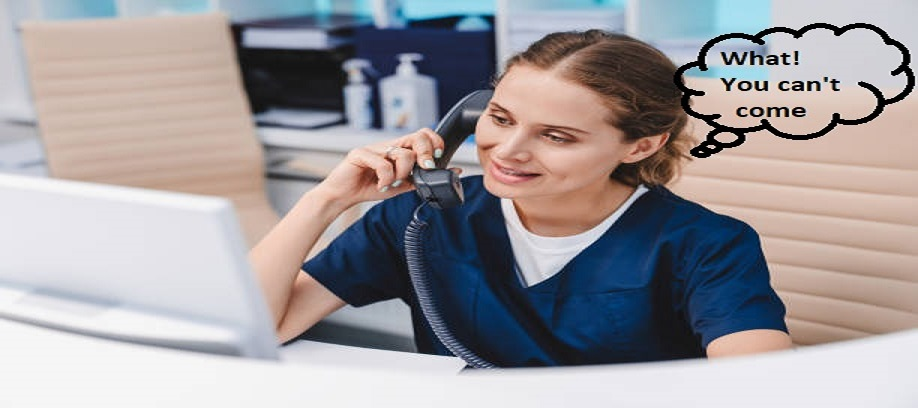

# PROBLEM STATEMENT

With the advent of online booking systems, the hospitality industry has undergone a drastic transformation. Online booking has changed how customers and hoteliers interact with each other. Changed customer behaviour has led to significant rise in reservations being called off due to cancellations or no-shows. Booking webistes and hotels charge a meagre amount for such cancellations but it is the least desireable option for them as it is a major revenue-diminishing factor.

**What if one could predict whether customers will honor their reservations or not, thereby enhancing revenue?**

# **Why reservation cancellation prediction is essential?**

* Revenue optimization
* Better resource allocation
* Cost reduction
* Strategic decision-making
* improved customer retention
* Efficient inventory management





# **What factors generally lead to reservation cancellations?**

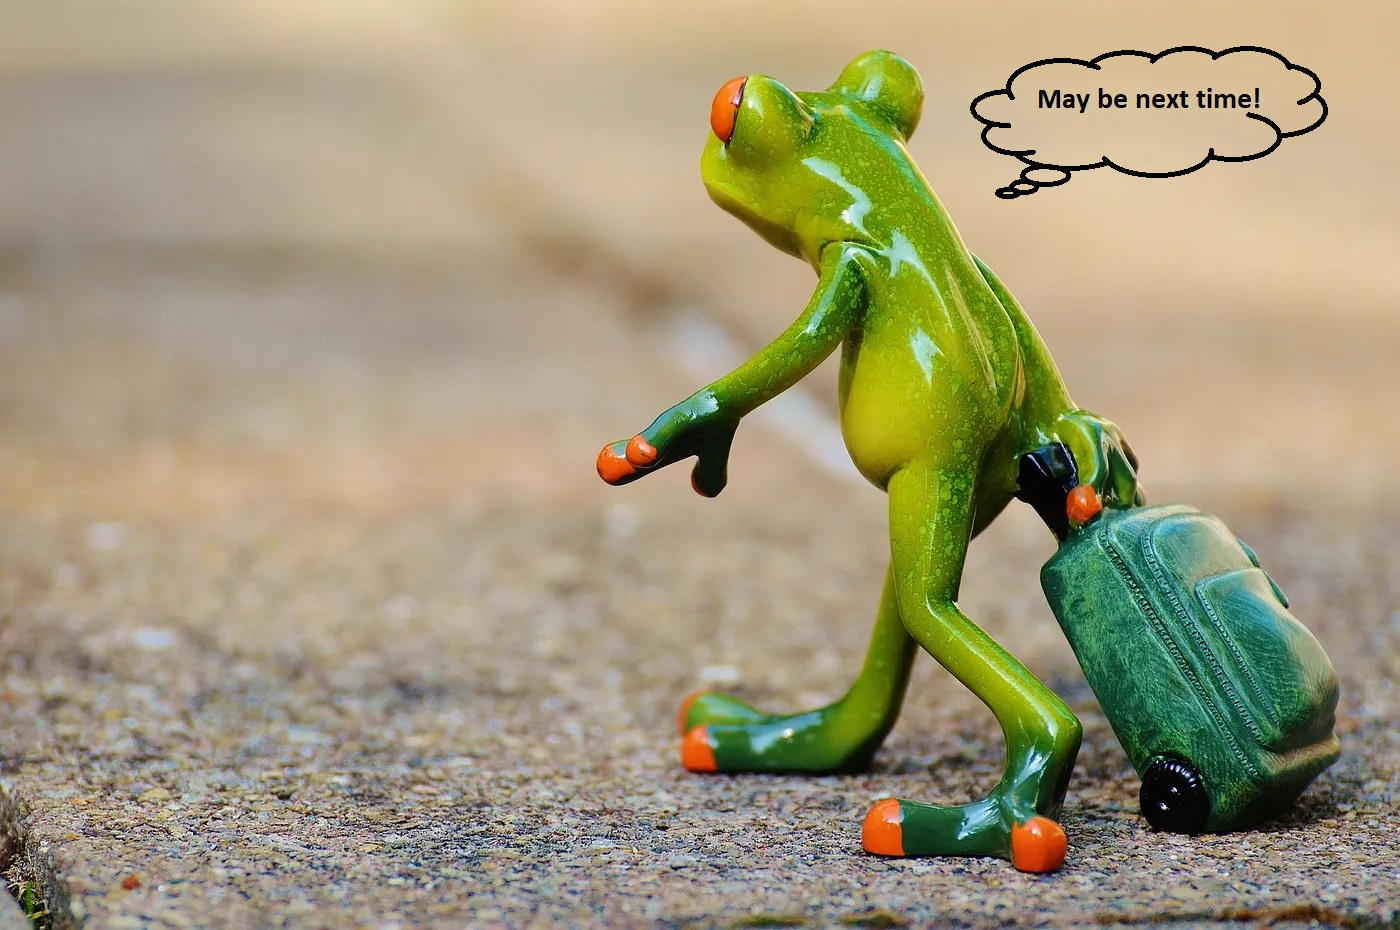
* Change of plans
* Travel restrictions
* Financial considerations
* Illness or health issues
* Dissatisfaction with services or accommodations
* Double bookings or conflicts
* Unforeseen circumstances


# **Feature Description**

*   **Booking_ID**: unique identifier of each booking
*   **no_of_adults**: Number of adults
*   **no_of_children**: Number of Children
*   **no_of_weekend_nights**: Number of weekend nights (Saturday or Sunday) the
guest stayed or booked to stay at the hotel
*   **no_of_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
*   **type_of_meal_plan**: Type of meal plan booked by the customer:
*   **required_car_parking_space**: Does the customer require a car parking space? (0 - No, 1- Yes)
*   **room_type_reserved**: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
*   **lead_time**: Number of days between the date of booking and the arrival date
*   **arrival_year**: Year of arrival date
*   **arrival_month**: Month of arrival date
*   **arrival_date**: Date of the month
*   **market_segment_type**: Market segment designation.
*   **repeated_guest**: Is the customer a repeated guest? (0 - No, 1- Yes)
*   **no_of_previous_cancellations**: Number of previous bookings that were  canceled by the customer prior to the current booking
*   **no_of_previous_bookings_not_canceled**: Number of previous bookings not canceled by the customer prior to the current booking
*   **avg_price_per_room**: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
*   **no_of_special_requests**: Total number of special requests made by the
customer (e.g. high floor, view from the room, etc)
*   **booking_status**: Flag indicating if the booking was canceled or not.





###  **Libraries to be imported**


In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix ,f1_score,accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier , RandomForestClassifier
from sklearn.metrics import roc_auc_score


### **Load the Data**

In [2]:
# Reading the data
df=pd.read_csv('Hotel Reservations.csv')

###  **Have a look at the Dataset**

In [3]:
#Look at the 5 top-most  values of the dataframe
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
#Look at the 5 bottom-most values of the dataframe
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


From the above, it can be seen that the **dataset contains both categorical and numerical features**. A closer look reveals that **some of the features exist in encoded form.**

### **Get the shape of Dataframe**

In [5]:
# Get the shape of the data
print(f'The number rows in the dataframe are    : {df.shape[0]}')
print(f'The number columns in the dataframe are : {df.shape[1]}')
print(f'The shape of the dataframe is           :{df.shape}')

The number rows in the dataframe are    : 36275
The number columns in the dataframe are : 19
The shape of the dataframe is           :(36275, 19)


### **Summary of the Dataframe**

In [6]:
# Get a concise summary of the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Dataset contains **float(1), int(13), object(5)** columns

### **Get the statistical view of Numerical Data**

In [7]:
# Use describe to study the numerical variables
# Note=Sometimes categorical variable maybe included if certain encoding is used by the data provider for categorical variables
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


### **The above table contains some features with no significance as they are in encoded form.

### **Check for any Null Values**

In [8]:
# Check for any missing values
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

From the above it can be concluded that the **data doesn't contain any missing values**.

### **Look for Number of Unique Values in each columns**

In [9]:
# Look for the number of unique values in the numerical features
num_unique=df.nunique()
print(num_unique)
print(len(num_unique))


Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64
19


Here, we can see that some of the numerical features have very low number of unique values which is indicative that these variables **might be** categorical variables.

### **Check if the Original Dataframe is still intact**


In [10]:
# No changes has been done to the dataset yet
# Check the integrity of the original dataframe using head() function
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


No changes has been observed to the original dataset.

#### **Create a duplicate dataframe for further usage**

In [11]:
# Use the copy function to create a new dataframe for further usage
new_df=df.copy()
print(f'The shape of the new datframe is {new_df.shape}')
new_df.head()

The shape of the new datframe is (36275, 19)


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### **Check for Redundant Columns**

In [12]:
# Look for the columns with only one unique value
one_value_cols = [col for col in df.columns if df[col].nunique() <= 1]
print(f'There are {len(one_value_cols)} columns in dataset with one unique value.')



There are 0 columns in dataset with one unique value.


### **Separate the response variable from the new dataframe**

### **Sort for Categorical Variables**

In [13]:
# Look for the categorical variables with the type object
# This will include response variable as it is a categorical variable

cat_object=new_df.select_dtypes(include='object')
#create an empty list to store categorical variable
cat_var=[]
for col in cat_object.columns:
  cat_var.append(col)
print(cat_var)

['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


#### Note : Here the response variable got included in the list of the categorical variable

### **Remove the  response variable from the list of the categorical variable list**

In [14]:
# Remove the response variable from the categorical variable list
cat_var.remove('booking_status')

In [15]:
# Look at the new categorical list
print(cat_var)

['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type']


### **Add the encoded categorical variable to the categorical variable list**



In [16]:
# Create the encoded list manually as described from the orignal dataset
encoded_cat=['required_car_parking_space','arrival_year','arrival_month','arrival_date','repeated_guest']
print(f'The list of encoded categorical variable as given in the dataset: {encoded_cat}')


The list of encoded categorical variable as given in the dataset: ['required_car_parking_space', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest']


### **Merge the encoded categorical list to the categorical variable list to the  categorical unique list**


In [17]:
# Merging the encoded and object categorical variable list to get the  unique categorical list
cat_unique=cat_var+ encoded_cat

In [18]:
# Look at the unique categorical variable list
print(cat_unique)

['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'required_car_parking_space', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest']


In [19]:
# dropping irrelevant column from the list of categorical variable
cat_final= list(cat_unique)
cat_final.remove('Booking_ID')
cat_final.remove('arrival_date')
cat_final.remove('arrival_year')


print(cat_final)
print(cat_unique)

['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'required_car_parking_space', 'arrival_month', 'repeated_guest']
['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'required_car_parking_space', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest']


### **Create a list to get all columns name**


In [20]:
# Creat the columns list
columns=new_df.columns.values.tolist()
print(columns)

['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status']


### **Drop the categorical variable and response variable from the list of total columns**

In [21]:
# Removing the response variable from the columns list
columns.remove('booking_status')



In [22]:
# Remove the categorical variable as well to get the list of the numerical variables
num_unique=[x for x in columns if x not in cat_unique]
print(num_unique)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


In [23]:
new_df.head()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### **Find the correlation between the different variables**


<Axes: >

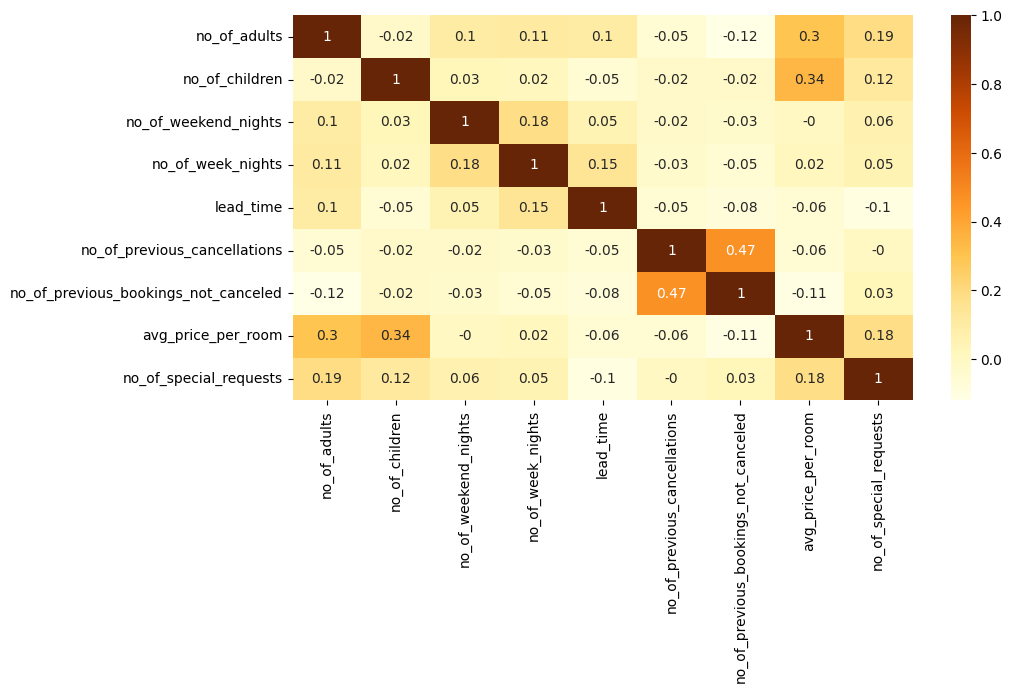

In [24]:
correlation = new_df[num_unique].corr().round(2)
plt.figure(figsize = (10,5))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

#### From the above correlation matrix it can be concluded:
* There isn't any strong correlation between any numerical  variables





In [25]:
reasonable_value_cols = [col for col in new_df.columns if new_df[col].nunique() <= 31]
print(f'There are {len(reasonable_value_cols)} columns in dataset with 31 unique value.')

There are 15 columns in dataset with 31 unique value.


### **Univariate Analysis**

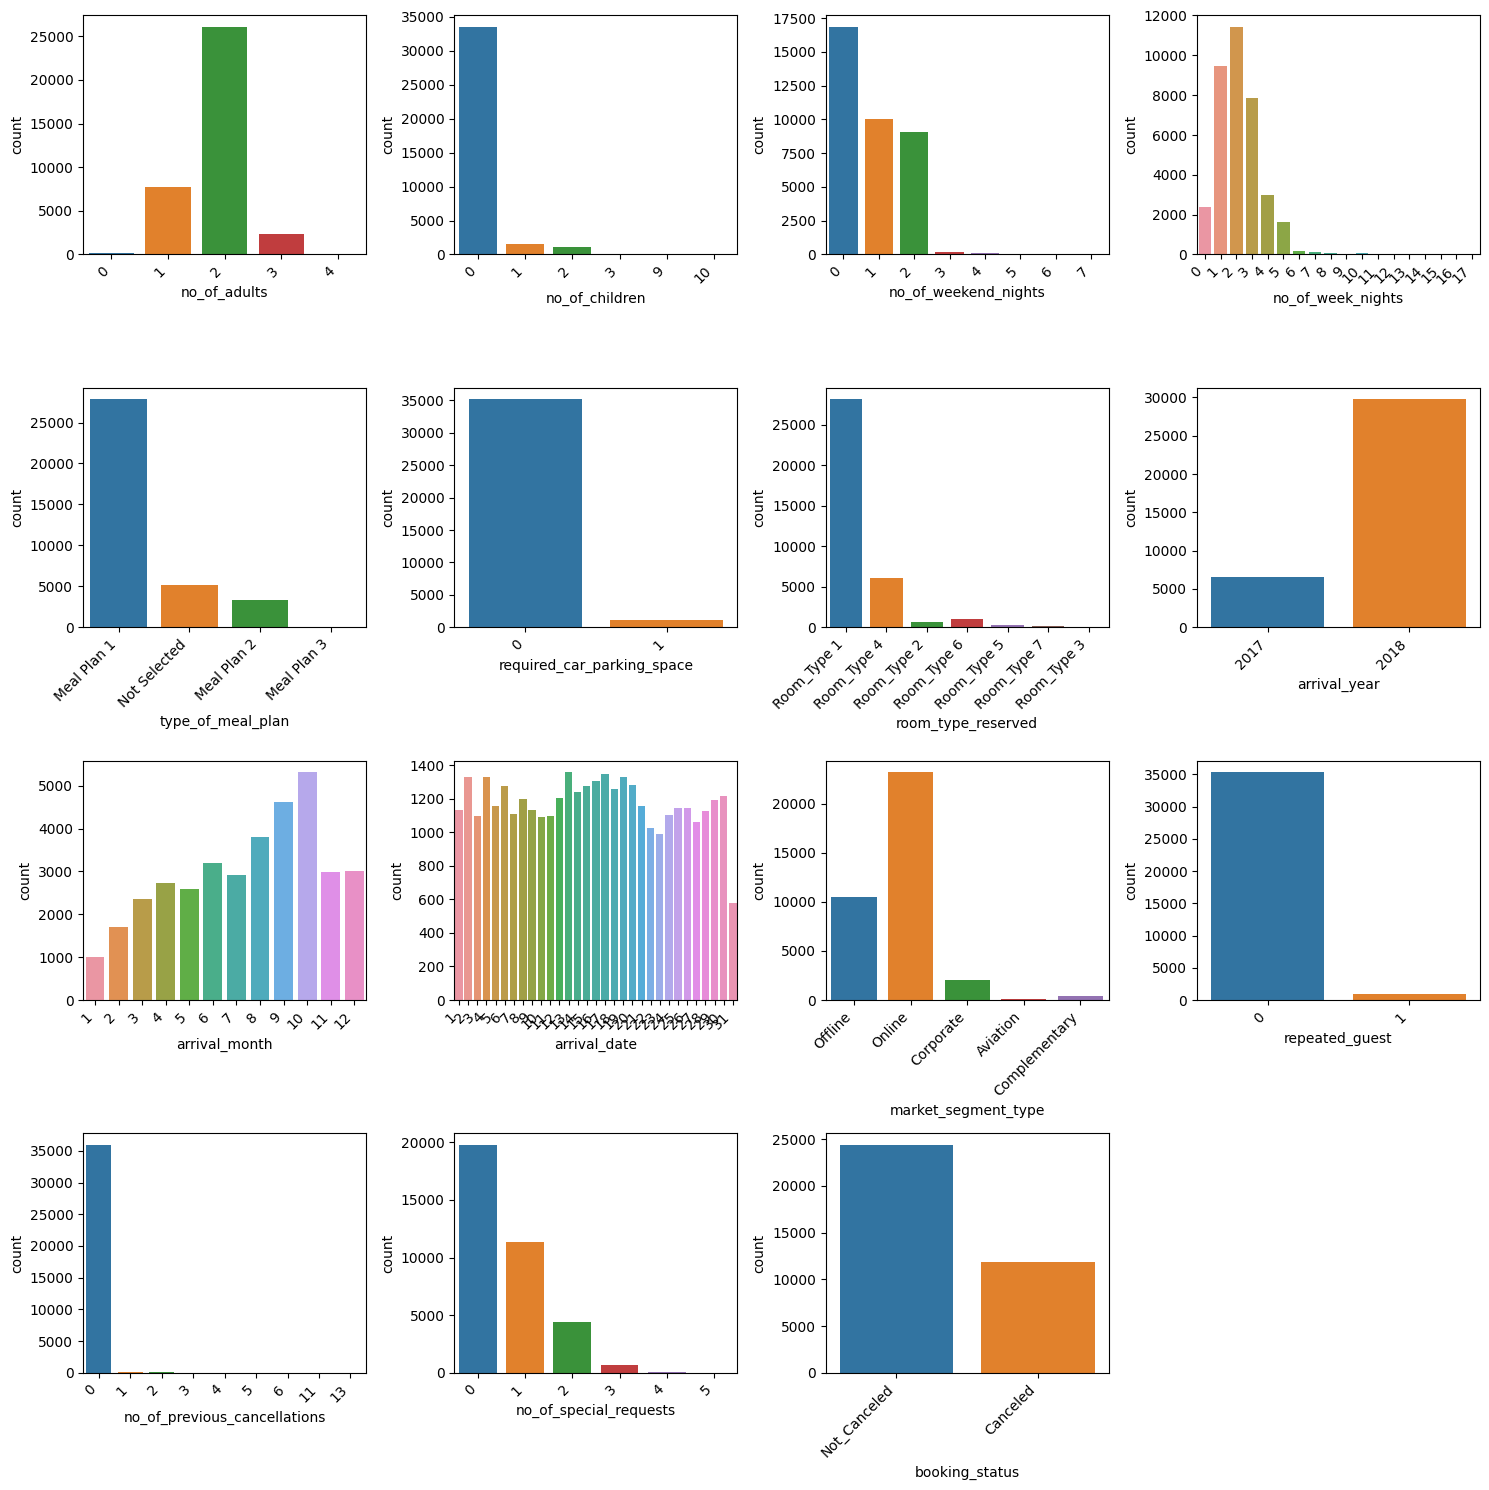

In [26]:
# Reserve the sufficient space for the fig
fig = plt.figure(figsize= (15,15))
# using enumerate run a loop to get the count plot for all reasonable variables
for i, col in enumerate(reasonable_value_cols):

    ax=fig.add_subplot(4,4,i+1)

    sns.countplot(x=new_df[col], ax=ax)

    plt.xticks(rotation=45, ha='right')

fig.tight_layout()
plt.show()

The following conlusions can be drawn from the above univariate analysis having unique values less than 32:

* '**no_of_adults**': Majority of the bookings are for 2 adults followed by 1 and 3 adults.
* '**no_of_children**': Majority of the bookings are with no children at all.
* '**no_of_weekend_nights**': Major portiion of the bookings does not have a weekend night stays
* '**no_of_week_nights**': Majority of bookings have 3 weeks days, followed by 2 and 4 weeks days respectively.
* '**type_of_meal_plan**': Most people have selected meal plan 1 as there preferred option.
* '**required_car_parking_space**': Most people do not look  for car parking space while booking reservations.
* '**room_type_reserved**': Majority of the people prefer room type 1 for staying followed by room type 4 .
* '**arrival_year**': Most of the reservation have come for the year 2018 when compared to the year 2017.
* '**arrival_month**': Most people prefer october, followed by september month.
* '**arrival_date**': No specific pattern can be observed based on date.
* '**market_segment_type**': Majority of the guest are of type online followed by offline.
* '**repeated_guest**': Majority of guest have booked for the first time.
* '**no_of_previous_cancellations**': Majority of the guest have no previous cancellation record.
* '**no_of_special_requests**': Majority of the guest have made no special request followed by 1,2,3 requests respectively.
* '**booking_status**: There are more number of guest who have not canceled as compared to the person who have cancelled the reservations.

### **Note**= Some of the featuress had too many unique values in them to give a better understanding via histogram. Hence, they haven't been plotted here.



##### **Univariate analysis for continous numerical variables**

<Axes: xlabel='no_of_previous_bookings_not_canceled', ylabel='Count'>

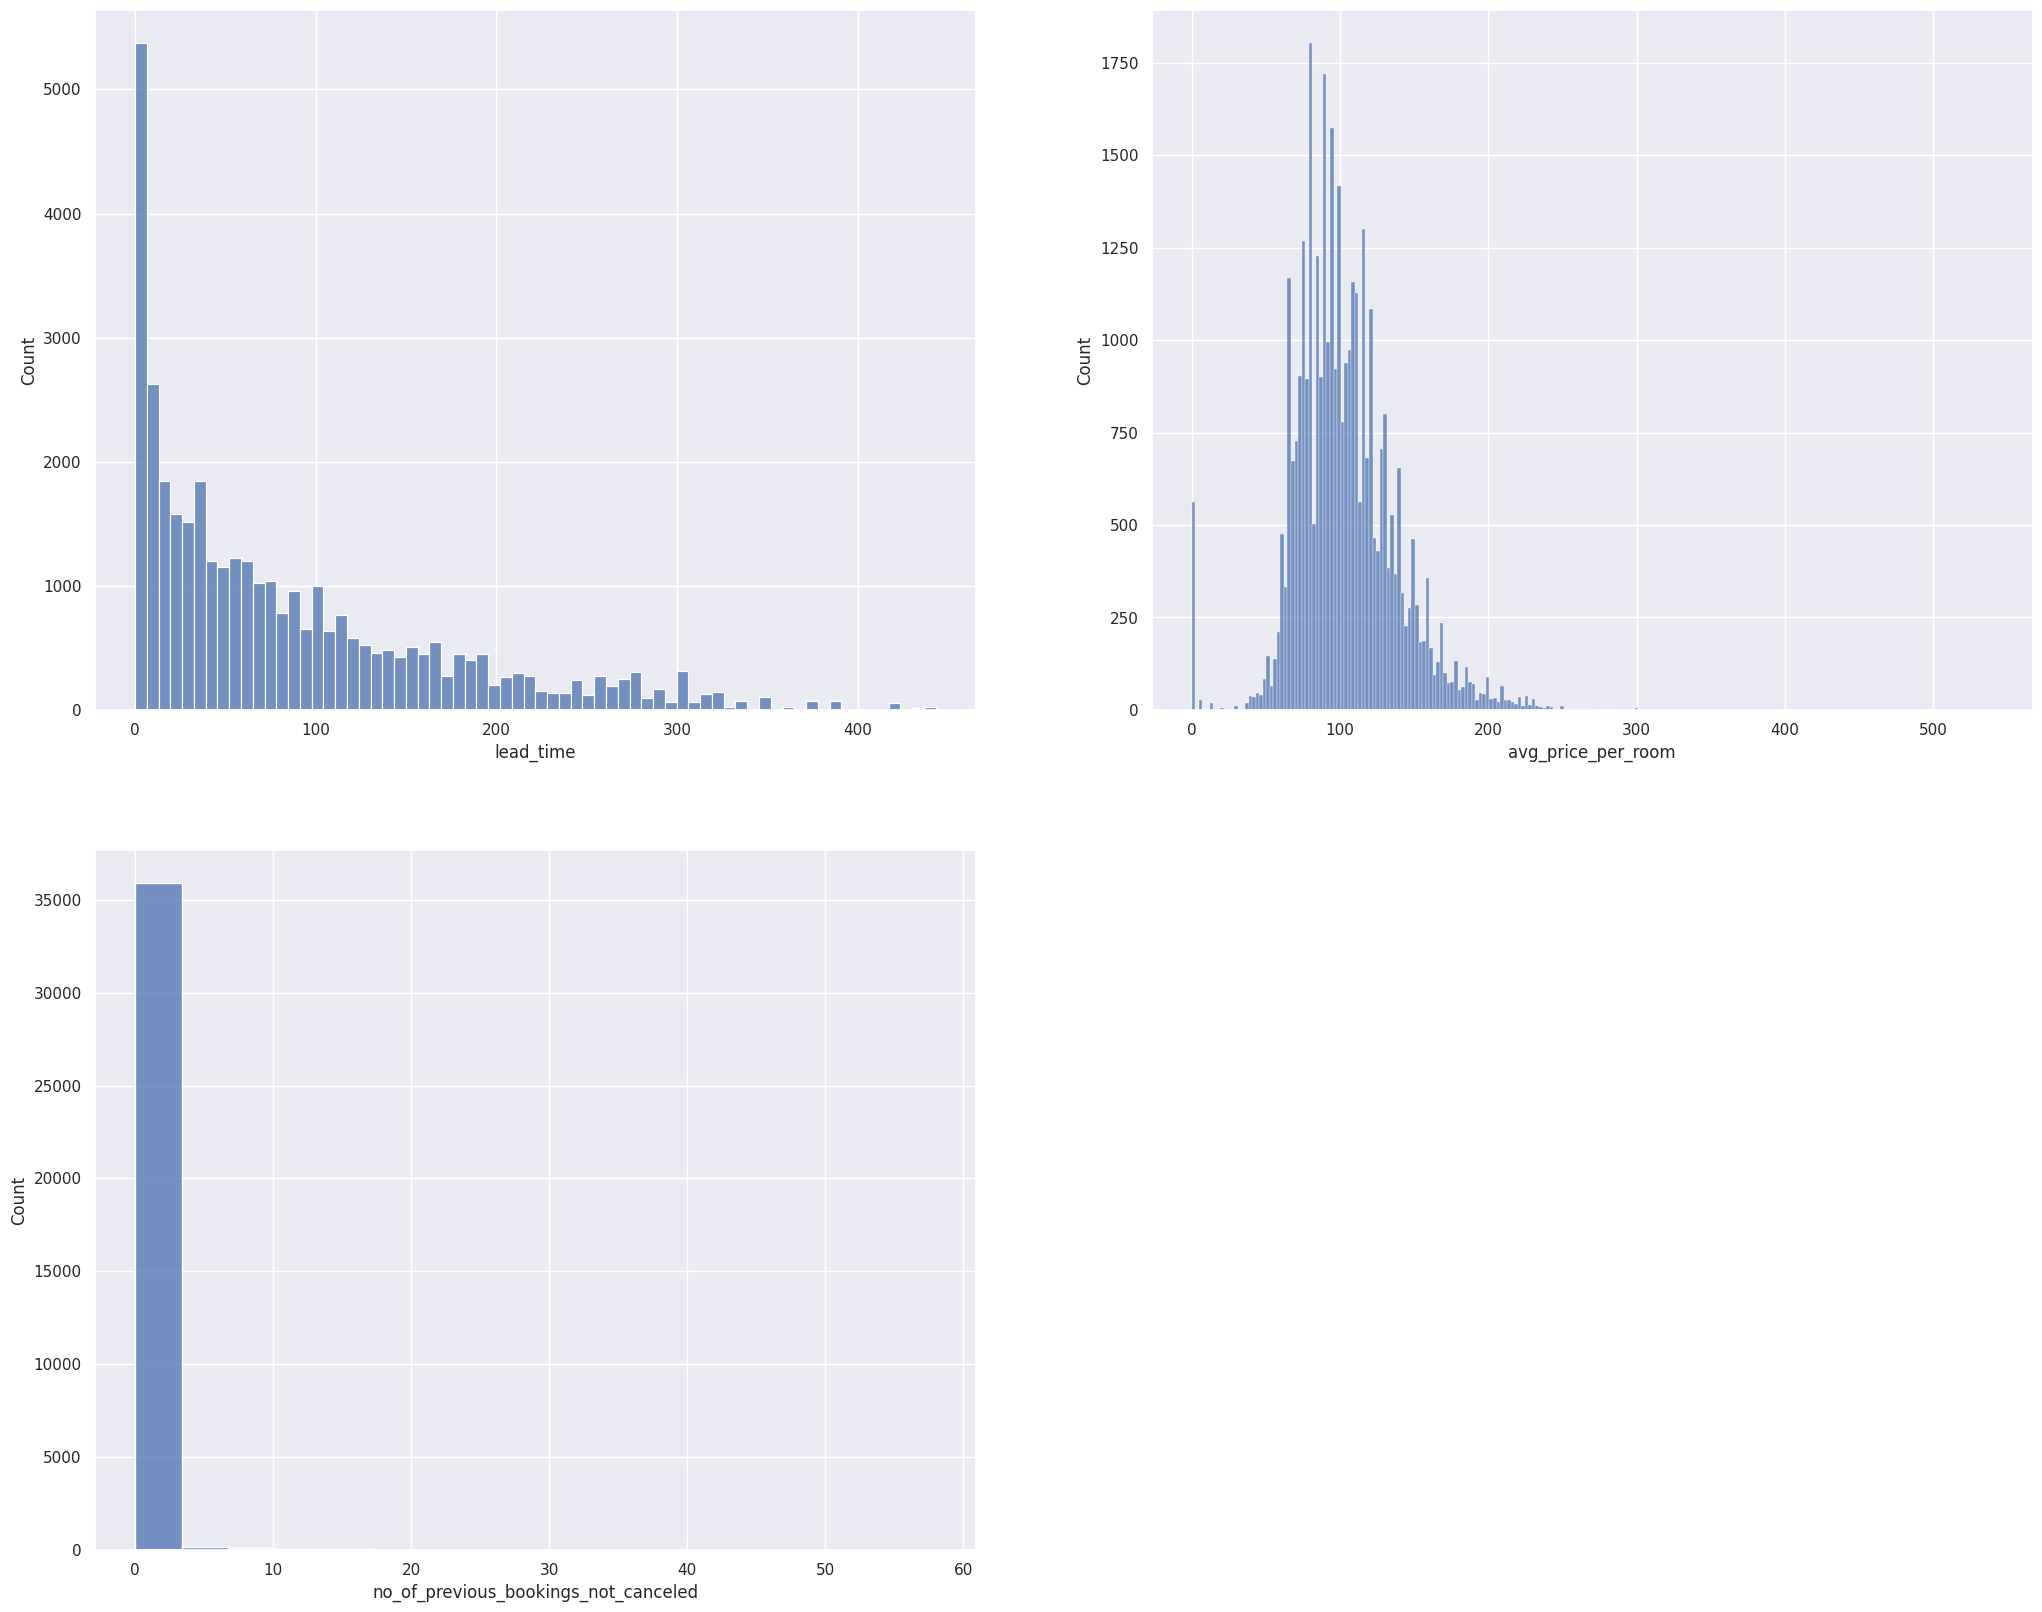

In [27]:
# reserve the space for different plots
plt.figure(figsize = (25,20))
sns.set(color_codes = True)
# plot the different curves as per the requirement

plt.subplot(2,2,1)
sns.histplot(df['lead_time'], kde = False)

plt.subplot(2,2,2)
sns.histplot(df['avg_price_per_room'], kde = False)

plt.subplot(2,2,3)
sns.histplot(df['no_of_previous_bookings_not_canceled'], kde = False)

### **From the above following things can be concluded:**
* **lead_time**: Majority of the reservation have lead time zero and then usually count decreases with increase in lead time.
* **avg_price_per_room**: Majority of the booking have average_price_per_room near the 100 euros marks as seen from the graph.
* **no_of_previous_bookings_not_canceled** : very large portion of the values

### **Bivariate analysis**

In [28]:
print(reasonable_value_cols)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_special_requests', 'booking_status']


In [29]:
# sns.pairplot(new_df[reasonable_value_cols],hue='booking_status')
# print()

In [30]:
new_df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [31]:
# Calculate the IQR (Interquartile Range)
list1=list(num_unique)
list1.remove('no_of_adults')
list1.remove('no_of_children')
list1.remove('no_of_weekend_nights')
list1.remove('no_of_special_requests')
list1.remove('no_of_previous_cancellations')
print(list1)
for x in  list1:
    Q1 = new_df[x].quantile(0.25)
    Q3 = new_df[x].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = new_df[(new_df[x] < lower_bound) | (new_df[x] > upper_bound)]

    # Display or handle outliers as needed
    print(x)
    print(type(outliers))
    print(len(outliers))
    print(outliers.shape)
    # Find common rows between df1 and df2 using merge
    merged = new_df.merge(outliers, on=list(new_df.columns), how='left', indicator=True)

    # Filter out rows that are in both DataFrames
    new_df = merged[merged['_merge'] == 'left_only'].drop(columns=['_merge'])

    # df1_unique now contains the rows from df1 that are not present in df2
    print(new_df.shape)    

['no_of_week_nights', 'lead_time', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room']
no_of_week_nights
<class 'pandas.core.frame.DataFrame'>
324
(324, 19)
(35951, 19)
lead_time
<class 'pandas.core.frame.DataFrame'>
1323
(1323, 19)
(34628, 19)
no_of_previous_bookings_not_canceled
<class 'pandas.core.frame.DataFrame'>
809
(809, 19)
(33819, 19)
avg_price_per_room
<class 'pandas.core.frame.DataFrame'>
1350
(1350, 19)
(32469, 19)


### Shape of dataframe after outlier removal

In [32]:
new_df.head()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [33]:
new_df.shape


(32469, 19)

In [34]:
cat_final.remove('required_car_parking_space')
cat_final.remove('repeated_guest')
print(cat_final)

['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'arrival_month']


In [35]:
print(cat_final)

['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'arrival_month']


In [36]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()
for x in cat_final:
#  Encode the 'Color' column
    new_df[x+'_encoded'] = label_encoder.fit_transform(new_df[x])

# # Drop the original 'Color' column
    new_df.drop(columns=[x], inplace=True)






In [37]:

# Encode the 'Color' column
new_df['Booking_status_encoded'] = label_encoder.fit_transform(new_df['booking_status'])

# Drop the original 'Color' column
new_df.drop(columns=['booking_status'], inplace=True)

# Print the DataFrame with only the encoded column
new_df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_encoded,room_type_reserved_encoded,market_segment_type_encoded,arrival_month_encoded,Booking_status_encoded
0,INN00001,2,0,1,2,0,224,2017,2,0,0,0,65.00,0,0,0,3,9,1
1,INN00002,2,0,2,3,0,5,2018,6,0,0,0,106.68,1,2,0,4,10,1
2,INN00003,1,0,2,1,0,1,2018,28,0,0,0,60.00,0,0,0,4,1,0
3,INN00004,2,0,0,2,0,211,2018,20,0,0,0,100.00,0,0,0,4,4,0
4,INN00005,2,0,1,1,0,48,2018,11,0,0,0,94.50,0,2,0,4,3,0


In [38]:
new_df.shape

(32469, 19)

In [39]:
new_df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_encoded,room_type_reserved_encoded,market_segment_type_encoded,arrival_month_encoded,Booking_status_encoded
0,INN00001,2,0,1,2,0,224,2017,2,0,0,0,65.00,0,0,0,3,9,1
1,INN00002,2,0,2,3,0,5,2018,6,0,0,0,106.68,1,2,0,4,10,1
2,INN00003,1,0,2,1,0,1,2018,28,0,0,0,60.00,0,0,0,4,1,0
3,INN00004,2,0,0,2,0,211,2018,20,0,0,0,100.00,0,0,0,4,4,0
4,INN00005,2,0,1,1,0,48,2018,11,0,0,0,94.50,0,2,0,4,3,0


In [40]:
drop_columns=['Booking_ID','arrival_date','arrival_year','Booking_status_encoded']
X=new_df.drop(columns=drop_columns,axis=1)
y=new_df['Booking_status_encoded']

In [41]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'type_of_meal_plan_encoded',
       'room_type_reserved_encoded', 'market_segment_type_encoded',
       'arrival_month_encoded'],
      dtype='object')

In [42]:
X.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
required_car_parking_space                int64
lead_time                                 int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
type_of_meal_plan_encoded                 int64
room_type_reserved_encoded                int64
market_segment_type_encoded               int64
arrival_month_encoded                     int64
dtype: object

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [44]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the scaler on your training feature data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing feature data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Initialize and train classification models

# 1. Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)

# 2. Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# 3. k-Nearest Neighbors (k-NN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

# 4. Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# 5. Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 6. Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# 7. AdaBoost
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)


# 8. Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# 9. XG_Boost
xg_model = xgb.XGBClassifier()
xg_model.fit(X_train, y_train)
y_pred_xg = xg_model.predict(X_test)


# Evaluate the models
models = [
    ('Logistic Regression', y_pred_logistic),
    ('SVM', y_pred_svm),
    ('k-NN', y_pred_knn),
    ('Decision Tree', y_pred_tree),
    ('Random Forest', y_pred_rf),
    ('Gradient Boosting', y_pred_gb),
    ('AdaBoost', y_pred_adaboost),
    ('Naive Bayes', y_pred_nb),
    ('XG Boost', y_pred_xg)
]

for model_name, y_pred in models:
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy:', accuracy)
    print(f'{model_name} Classification Report:\n', classification_report(y_test, y_pred))
    print('=' * 60)


Logistic Regression Accuracy: 0.7973514012935017
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.57      0.64      2021
           1       0.82      0.90      0.86      4473

    accuracy                           0.80      6494
   macro avg       0.77      0.73      0.75      6494
weighted avg       0.79      0.80      0.79      6494

SVM Accuracy: 0.8353865106251925
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.64      0.71      2021
           1       0.85      0.92      0.89      4473

    accuracy                           0.84      6494
   macro avg       0.82      0.78      0.80      6494
weighted avg       0.83      0.84      0.83      6494

k-NN Accuracy: 0.8344625808438558
k-NN Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.70      0.72      2021
           1       0

In [49]:
# # Specify the file path where you want to save the model
# import pickle
# model_filename = 'rf_model.pkl'

# # Save the model to a file using pickle
# with open(model_filename, 'wb') as model_file:
#     pickle.dump(rf_model, model_file)

# print(f"Model saved as {model_filename}")

In [47]:
rf_prediction=rf_model.predict([[1,0,1,0,0,80,0,0,0,100,1,1,1,0,2]])
print(rf_prediction)

[1]
